In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
#from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [2]:
# Creates a dataset class
class Pittsburgh250k(Dataset):
    """Characterises a dataset for Pytorch"""

    def __init__(self, root_dir, files, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            labels (optional): Create a dictionary called labels where for each image of the dataset, 
                               the associated label is given by labels[image]
                               https://stanford-edu.tudelft.idm.oclc.org/~shervine/blog/pytorch-how-to-generate-data-parallel
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.files = files
        #self.labels = labels #optional see Args
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.root_dir)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        #self.files = os.listdir(root_dir)
        img_name = os.path.join(self.root_dir, files[idx])
        
        image = io.imread(img_name)
        sample = {'image': image}

        if self.transform:
            sample = self.transform(sample)

        return sample
    

In [3]:
# Helper function to show image
def show_images(image):
    plt.imshow(image)

0 (480, 640, 3)
1 (480, 640, 3)
2 (480, 640, 3)
3 (480, 640, 3)


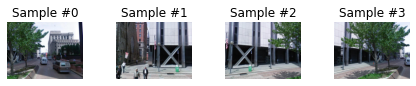

In [4]:
root_dir = r'C:\Users\Xander\Documents\TUDelft\4Master\Deep_learning\000'
files = os.listdir(root_dir)
p250k_dataset = Pittsburgh250k(root_dir, files)

fig = plt.figure()

for i in range(len(p250k_dataset)):
    sample = p250k_dataset[i]
    print(i, sample['image'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_images(**sample)

    if i == 3:
        plt.show()
        break

